In [8]:
# importing libraries
import networkx as nx
import random
import math
from collections import defaultdict
from itertools import combinations
import matplotlib.pyplot as plt
import time

In [9]:
G = nx.random_internet_as_graph(10000)
print("The graph is loaded!")

The graph is loaded!


In [10]:
def transivity(G, epsilon=0.1, delta=0.05, seed=None):
    if seed is not None:
        random.seed(seed)

    # Step 1: Calculate number of samples needed
    n_samples = math.ceil(math.log(2 / delta) / (2 * epsilon**2))

    # Step 2: Compute wedge counts per vertex
    wedge_counts = {}
    total_wedges = 0
    for v in G.nodes():
        d = G.degree(v)
        w = math.comb(d, 2) if d >= 2 else 0
        wedge_counts[v] = w
        total_wedges += w

    if total_wedges == 0:
        print("No wedges in the graph.")
        return 0

    # Step 3: Create sampling distribution π_v = wedge_count / total_wedges
    distribution = [wedge_counts[v] / total_wedges for v in G.nodes()]
    nodes = list(G.nodes())

    # Step 4: Sample n vertices according to π
    sampled_vertices = random.choices(nodes, weights=distribution, k=n_samples)

    # Step 5: For each sampled vertex, pick a wedge (i.e., two random neighbors)
    closed_wedge_count = 0
    for v in sampled_vertices:
        neighbors = list(G.neighbors(v))
        if len(neighbors) < 2:
            continue  # No wedge possible

        # Pick a random pair of neighbors (i.e., wedge)
        u, w = random.sample(neighbors, 2)
        # Check if the wedge is closed (i.e., u and w are connected)
        if G.has_edge(u, w):
            closed_wedge_count += 1

    # Step 6: Estimate fraction of closed wedges
    transivity_estimate = closed_wedge_count / n_samples

    # Step 7: Return triangle estimate
    
    return transivity_estimate

In [11]:
def transitivity_exact_function(G):
     # Step 2: Compute wedge counts per vertex
    wedge_counts = {}
    total_wedges = 0
    for v in G.nodes():
        d = G.degree(v)
        w = math.comb(d, 2) if d >= 2 else 0
        wedge_counts[v] = w
        total_wedges += w
        
    exact_number_of_triangle = sum(nx.triangles(G).values()) // 3
    transitivity_exact = 3*exact_number_of_triangle / total_wedges
    
    return transitivity_exact

In [20]:
# Parameters
epsilons = [0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07]
delta = 0.1
num_trials = 20

# Data storage
x_vals_blue = []
y_vals_blue = []
x_vals_red = []
y_vals_red = []
y_err_red = []

# Run experiments
for eps in epsilons:
    second_outputs = []
    for i in range(num_trials):
        first = transivity(G, eps, delta=0.1, seed=None)
        second = transitivity_exact_function(G)
        x_vals_blue.append(eps)
        y_vals_blue.append(first)
        second_outputs.append(second)
    # Use average of second outputs for red point
    avg_second = sum(second_outputs) / num_trials
    x_vals_red.append(eps)
    y_vals_red.append(avg_second)
    y_err_red.append(eps)  # Confidence interval is ±epsilon

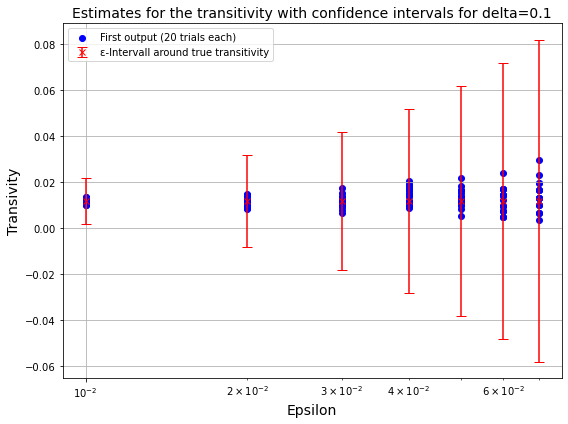

In [21]:
# Plotting the transitivity estimates with confidence interval
plt.figure(figsize=(8, 6))

# Blue points (first outputs)
plt.scatter(x_vals_blue, y_vals_blue, color='blue', label='First output (20 trials each)')

# Red points (second output means with confidence interval)
plt.errorbar(
    x_vals_red, y_vals_red,
    yerr=y_err_red,
    fmt='x',
    color='red',
    label='ε-Intervall around true transitivity',
    capsize=5,
    elinewidth=1.5
)

font_size = 14
plt.xscale('log')
plt.xlabel('Epsilon', fontsize = font_size)
plt.ylabel('Transivity', fontsize = font_size)
plt.title('Estimates for the transitivity with confidence intervals for delta=0.1', fontsize = font_size)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("transivity_plot.png", dpi=300, bbox_inches="tight")
plt.show()